In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.time_series_model_training import *

In [3]:
forecaster = TimeSeriesForecaster("../data/SPY_historical_data.csv")

In [4]:
SPY_df = forecaster._load_data()

In [5]:
forecaster.scale_data("../models/SPY_scaler.pkl")

In [6]:
forecaster.split_data()

In [7]:
xs, ys = forecaster.create_sequences(SPY_df, 90)

In [8]:
forecaster.train_arima()

Performing stepwise search to minimize aic


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10085.329, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10130.242, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10121.500, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10084.398, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10141.767, Time=2.42 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-10141.325, Time=1.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-10138.932, Time=1.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10135.102, Time=3.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-10138.815, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-10140.351, Time=0.31 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 10.830 seconds


In [9]:
forecaster.train_sarima()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[5]             : AIC=-9038.192, Time=0.40 sec
 ARIMA(1,1,0)(1,1,0)[5]             : AIC=-9428.939, Time=1.96 sec
 ARIMA(0,1,1)(0,1,1)[5]             : AIC=inf, Time=3.99 sec
 ARIMA(1,1,0)(0,1,0)[5]             : AIC=-9045.140, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[5]             : AIC=-9575.991, Time=3.22 sec
 ARIMA(1,1,0)(2,1,1)[5]             : AIC=inf, Time=6.87 sec
 ARIMA(1,1,0)(1,1,1)[5]             : AIC=inf, Time=5.32 sec
 ARIMA(0,1,0)(2,1,0)[5]             : AIC=-9518.639, Time=0.69 sec
 ARIMA(2,1,0)(2,1,0)[5]             : AIC=-9592.772, Time=5.01 sec
 ARIMA(2,1,0)(1,1,0)[5]             : AIC=-9439.840, Time=1.89 sec
 ARIMA(2,1,0)(2,1,1)[5]             : AIC=inf, Time=12.88 sec
 ARIMA(2,1,0)(1,1,1)[5]             : AIC=inf, Time=7.65 sec
 ARIMA(3,1,0)(2,1,0)[5]             : AIC=-9591.869, Time=11.03 sec
 ARIMA(2,1,1)(2,1,0)[5]             : AIC=-9615.726, Time=8.38 sec
 ARIMA(2,1,1)(1,1,0)[5]             : AIC=-9496

In [10]:
forecaster.train_lstm()

c:\Users\Ashis\Desktop\KAIM Program 2\week_11\week_11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 153ms/step - loss: 0.0452 - val_loss: 0.0013
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 0.0037 - val_loss: 0.0284
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0024 - val_loss: 9.8451e-04
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0019 - val_loss: 7.5315e-04
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0020 - val_loss: 7.2379e-04
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0018 - val_loss: 9.3261e-04
Epoch 10/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.0015 - val_loss: 7.9644e-04
Epoch 11/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 12/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 

In [11]:
forecaster.make_predictions()

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step


In [12]:
forecaster.evaluate_models()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


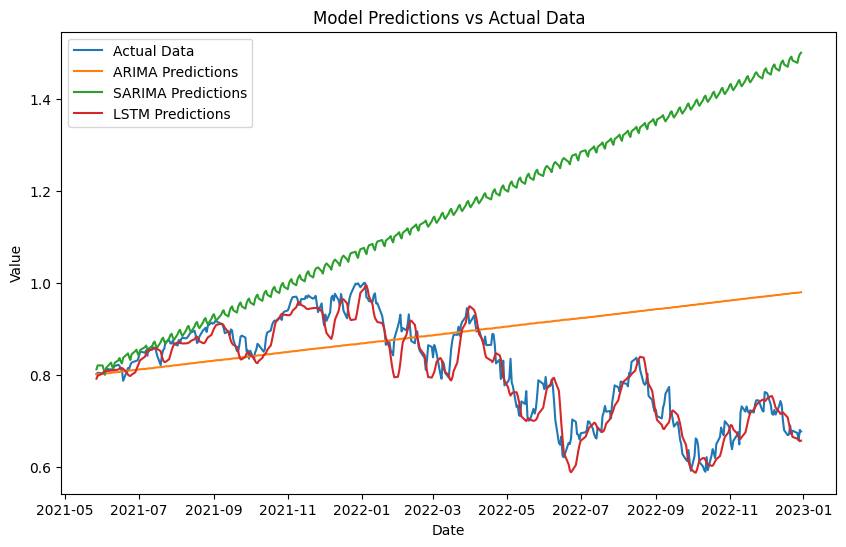

In [13]:
forecaster.plot_results()

In [14]:
forecaster.forecast_future()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━

{'LSTM': [0.65988517,
  0.6609905,
  0.6613467,
  0.6612945,
  0.6610442,
  0.6607244,
  0.66041243,
  0.66015184,
  0.65996647,
  0.65986747,
  0.65985876,
  0.65993965,
  0.660107,
  0.6603565,
  0.66068465,
  0.6610872,
  0.66155976,
  0.6620984,
  0.6626989,
  0.6633575,
  0.6640699,
  0.6648321,
  0.66564035,
  0.66649103,
  0.66738117,
  0.6683073,
  0.6692666,
  0.67025614,
  0.67127335,
  0.6723157]}